In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import pylab
from collections import Counter
import time

from sklearn.model_selection import train_test_split

import pickle



In [2]:
readcsv_GenMix_2018_2022=pd.read_csv(r"..\ImportData\GenMix_2018_2022.csv")

GenMix_nanremoved = pd.read_pickle(r"..\GenMixAnalysis\GenMix_nanremoved.pkl")

GenMix_Consolidated = pd.read_pickle(r"..\GenMixAnalysis\GenMix_Consolidated.pkl")

In [5]:
GenMix_nanremoved

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil Market,Diesel Fuel Oil Self,Hydro Market,Hydro Self,Natural Gas Market,Natural Gas Self,Nuclear Market,...,Waste Disposal Services Market,Waste Disposal Services Self,Wind Market,Wind Self,Waste Heat Market,Waste Heat Self,Other Market,Other Self,Load,datetime
0,2018-01-01T06:00:00Z,2948.5,18203.9,0.0,4.4,43.1,759.6,5903.9,3447.6,0.0,...,0.0,10.8,0.0,3643.1,0.0,0.0,0.0,27.1,36439.754,2018-01-01 06:00:00+00:00
1,2018-01-01T06:05:00Z,2917.3,18191.4,0.0,4.4,43.3,775.3,5842.2,3468.0,0.0,...,0.0,10.9,0.0,3619.8,0.0,0.0,0.0,27.3,36389.511,2018-01-01 06:05:00+00:00
2,2018-01-01T06:10:00Z,2916.5,18181.4,0.0,0.0,43.8,802.2,5983.2,3479.6,0.0,...,0.0,11.0,0.0,3578.9,0.0,0.0,0.0,27.0,36386.829,2018-01-01 06:10:00+00:00
3,2018-01-01T06:15:00Z,2913.0,18159.0,0.0,0.0,43.8,776.5,6116.0,3385.1,0.0,...,0.0,10.9,0.0,3539.2,0.0,0.0,0.0,26.9,36290.426,2018-01-01 06:15:00+00:00
4,2018-01-01T06:20:00Z,2911.5,18154.1,0.0,0.0,43.3,713.7,6182.6,3438.3,0.0,...,0.0,10.9,0.0,3515.1,0.0,0.0,0.0,27.3,36225.646,2018-01-01 06:20:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503637,2022-10-16T20:10:00Z,6245.0,1986.5,0.0,0.0,23.4,925.4,5397.8,529.7,0.0,...,2.5,6.2,0.0,11384.6,0.0,0.0,0.0,19.8,27022.455,2022-10-16 20:10:00+00:00
503638,2022-10-16T20:15:00Z,6282.1,1976.4,0.0,0.0,23.7,925.8,5306.1,468.4,0.0,...,2.6,6.2,0.0,11391.8,0.0,0.0,0.0,19.7,27030.275,2022-10-16 20:15:00+00:00
503639,2022-10-16T20:20:00Z,6228.8,1972.4,0.0,0.0,24.0,926.9,5130.1,413.6,0.0,...,2.5,6.2,0.0,11504.9,0.0,0.0,0.0,19.7,26973.540,2022-10-16 20:20:00+00:00
503640,2022-10-16T20:25:00Z,6190.3,2065.0,0.0,0.0,23.8,926.1,4926.5,432.7,0.0,...,2.5,6.1,0.0,11662.7,0.0,0.0,0.0,19.6,26975.018,2022-10-16 20:25:00+00:00


In [4]:

GenMix_train, GenMix_test = train_test_split(GenMix_nanremoved,train_size = .8,shuffle= False)

In [37]:
GenMix_test.columns[1:-1]

Index(['Coal Market', 'Coal Self', 'Diesel Fuel Oil Market',
       'Diesel Fuel Oil Self', 'Hydro Market', 'Hydro Self',
       'Natural Gas Market', 'Natural Gas Self', 'Nuclear Market',
       'Nuclear Self', 'Solar Market', 'Solar Self',
       'Waste Disposal Services Market', 'Waste Disposal Services Self',
       'Wind Market', 'Wind Self', 'Waste Heat Market', 'Waste Heat Self',
       'Other Market', 'Other Self', 'Load'],
      dtype='object')

In [39]:
GenMix_Cons_train, GenMix_Cons_test = train_test_split(GenMix_Consolidated,train_size = .8,shuffle= False)

In [40]:
GenMix_test_diff = GenMix_test[GenMix_test.columns[1:-1]].diff().iloc[1:]

Then, can calculate MAE

In [41]:
GenMix_test_diff.abs().mean()

Coal Market                       49.826935
Coal Self                         28.187079
Diesel Fuel Oil Market             0.318047
Diesel Fuel Oil Self               0.173122
Hydro Market                       3.611130
Hydro Self                        10.458861
Natural Gas Market                94.105852
Natural Gas Self                  40.489110
Nuclear Market                     0.000000
Nuclear Self                       1.812534
Solar Market                       0.000000
Solar Self                         3.722123
Waste Disposal Services Market     0.043533
Waste Disposal Services Self       0.137564
Wind Market                        0.000000
Wind Self                         96.049933
Waste Heat Market                  0.000000
Waste Heat Self                    0.000000
Other Market                       0.087447
Other Self                         0.166608
Load                              92.479637
dtype: float64

or RMSE

In [42]:
np.sqrt(GenMix_test_diff.pow(2).mean())

Coal Market                        79.941408
Coal Self                          60.080038
Diesel Fuel Oil Market              3.456347
Diesel Fuel Oil Self                2.131968
Hydro Market                       15.092571
Hydro Self                         36.373193
Natural Gas Market                157.234587
Natural Gas Self                  107.158446
Nuclear Market                      0.000000
Nuclear Self                        5.313606
Solar Market                        0.000000
Solar Self                          8.839734
Waste Disposal Services Market      0.112659
Waste Disposal Services Self        0.249225
Wind Market                         0.000000
Wind Self                         130.498672
Waste Heat Market                   0.000000
Waste Heat Self                     0.000000
Other Market                        0.709104
Other Self                          0.741189
Load                              116.867674
dtype: float64

In [5]:
GenMix_Consolidated


,GMT MKT Interval,datetime,Coal Total,Natural Gas Total,Wind Total,Hydro Total,Nuclear Total
0,2018-01-01T06:00:00Z,2018-01-01 06:00:00+00:00,21152.4,9351.5,3643.1,802.7,2033.8
1,2018-01-01T06:05:00Z,2018-01-01 06:05:00+00:00,21108.7,9310.2,3619.8,818.6,2034.4
2,2018-01-01T06:10:00Z,2018-01-01 06:10:00+00:00,21097.9,9462.8,3578.9,846.0,2034.0
3,2018-01-01T06:15:00Z,2018-01-01 06:15:00+00:00,21072.0,9501.1,3539.2,820.3,2034.4
4,2018-01-01T06:20:00Z,2018-01-01 06:20:00+00:00,21065.6,9620.9,3515.1,757.0,2034.5
...,...,...,...,...,...,...,...
398517,2022-10-16T20:10:00Z,2022-10-16 20:10:00+00:00,8231.5,5927.5,11384.6,948.8,0.0
398518,2022-10-16T20:15:00Z,2022-10-16 20:15:00+00:00,8258.5,5774.5,11391.8,949.5,0.0
398519,2022-10-16T20:20:00Z,2022-10-16 20:20:00+00:00,8201.2,5543.7,11504.9,950.9,0.0
398520,2022-10-16T20:25:00Z,2022-10-16 20:25:00+00:00,8255.3,5359.2,11662.7,949.9,0.0


In [9]:
GenMix_Cons_train, GenMix_Cons_test = train_test_split(GenMix_Consolidated,train_size = .8,shuffle= False)

In [13]:
GenMix_Cons_test.columns[2:]

Index(['Coal Total', 'Natural Gas Total', 'Wind Total', 'Hydro Total',
       'Nuclear Total'],
      dtype='object')

The Naive forecast just uses the current value to predict the next value, so the errors are just the consecutive differences.

Here we're using one-step-ahead forecasting. (Other cases we seem to be looking at long-term forecasting)

In [18]:
GenMix_Cons_test_diff = GenMix_Cons_test[GenMix_Cons_test.columns[2:]].diff().iloc[1:]

Then, can calculate MAE

In [23]:
GenMix_Cons_test_diff.abs().mean()

Coal Total           64.038086
Natural Gas Total    90.919617
Wind Total           96.049933
Hydro Total          11.880384
Nuclear Total         1.812534
dtype: float64

or RMSE

In [21]:
np.sqrt(GenMix_Cons_test_diff.pow(2).mean())

Coal Total            87.476114
Natural Gas Total    129.631506
Wind Total           130.498672
Hydro Total           37.243687
Nuclear Total          5.313606
dtype: float64

In [6]:
ace_1min_14_22_nan_removed

,GMTTime,1 Min ACE Average,datetime
0,2014-03-01T06:00:00Z,-26.9910,2014-03-01 06:00:00+00:00
1,2014-03-01T06:01:00Z,-86.1290,2014-03-01 06:01:00+00:00
2,2014-03-01T06:02:00Z,-95.1770,2014-03-01 06:02:00+00:00
3,2014-03-01T06:03:00Z,-69.5760,2014-03-01 06:03:00+00:00
4,2014-03-01T06:04:00Z,-31.9080,2014-03-01 06:04:00+00:00
...,...,...,...
3805682,2022-10-16T04:55:00Z,111.4383,2022-10-16 04:55:00+00:00
3805683,2022-10-16T04:56:00Z,110.1949,2022-10-16 04:56:00+00:00
3805684,2022-10-16T04:57:00Z,115.4496,2022-10-16 04:57:00+00:00
3805685,2022-10-16T04:58:00Z,108.1516,2022-10-16 04:58:00+00:00


In [3]:
ace_1min_14_22_nan_removed = pd.read_pickle(r"..\CC_ACE_Analysis\ace_1min_14_22_nan_removed.pkl")


In [25]:
ACE_train, ACE_test = train_test_split(ace_1min_14_22_nan_removed,train_size = .8,shuffle= False)

In [28]:
ACE_test

,GMTTime,1 Min ACE Average,datetime
3044571,2021-04-24T22:26:00Z,0.0530,2021-04-24 22:26:00+00:00
3044572,2021-04-24T22:27:00Z,-47.2353,2021-04-24 22:27:00+00:00
3044573,2021-04-24T22:28:00Z,64.5720,2021-04-24 22:28:00+00:00
3044574,2021-04-24T22:29:00Z,123.3202,2021-04-24 22:29:00+00:00
3044575,2021-04-24T22:30:00Z,35.3459,2021-04-24 22:30:00+00:00
...,...,...,...
3805682,2022-10-16T04:55:00Z,111.4383,2022-10-16 04:55:00+00:00
3805683,2022-10-16T04:56:00Z,110.1949,2022-10-16 04:56:00+00:00
3805684,2022-10-16T04:57:00Z,115.4496,2022-10-16 04:57:00+00:00
3805685,2022-10-16T04:58:00Z,108.1516,2022-10-16 04:58:00+00:00


In [29]:
ACE_test.columns[1]

'1 Min ACE Average'

In [30]:
ACE_test_diff = ACE_test[ACE_test.columns[1]].diff().iloc[1:]

Then, can calculate MAE

In [31]:
ACE_test_diff.abs().mean()

40.339082777373164

In [46]:
ACE_test[ACE_test.columns[1]]

3044571      0.0530
3044572    -47.2353
3044573     64.5720
3044574    123.3202
3044575     35.3459
             ...   
3805682    111.4383
3805683    110.1949
3805684    115.4496
3805685    108.1516
3805686    134.5231
Name: 1 Min ACE Average, Length: 761116, dtype: float64

Illustration of one-step-ahead rolling forecast

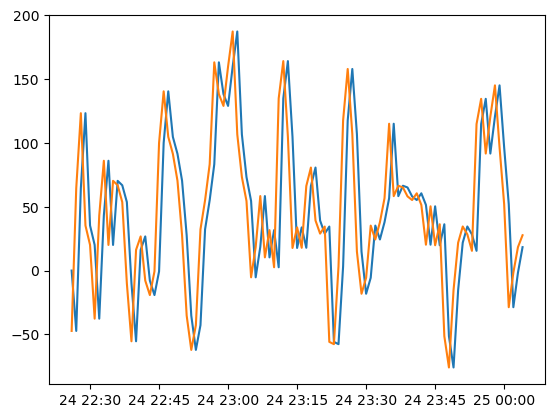

In [53]:
plt.plot(ACE_test[ACE_test.columns[2]][0:99],ACE_test[ACE_test.columns[1]][0:99])
plt.plot(ACE_test[ACE_test.columns[2]][0:99],ACE_test[ACE_test.columns[1]][1:100])


In [62]:
ACE_test[ACE_test.columns[1]][0:1]

3044571    0.053
Name: 1 Min ACE Average, dtype: float64

In [63]:
np.repeat(ACE_test[ACE_test.columns[1]][0:1],100)

3044571    0.053
3044571    0.053
3044571    0.053
3044571    0.053
3044571    0.053
           ...  
3044571    0.053
3044571    0.053
3044571    0.053
3044571    0.053
3044571    0.053
Name: 1 Min ACE Average, Length: 100, dtype: float64

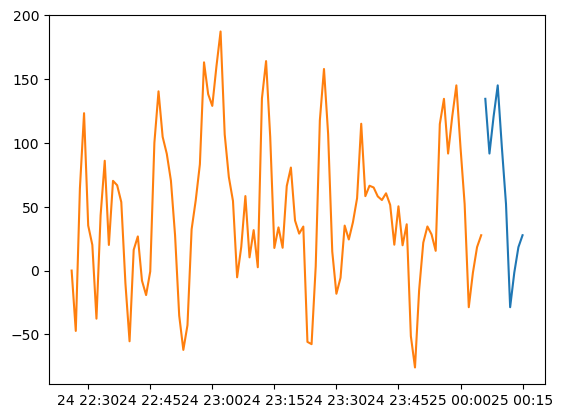

In [77]:
plt.plot(ACE_test[ACE_test.columns[2]][100:110],(ACE_test[ACE_test.columns[1]][90:100]))
plt.plot(ACE_test[ACE_test.columns[2]][0:100],ACE_test[ACE_test.columns[1]][0:100])


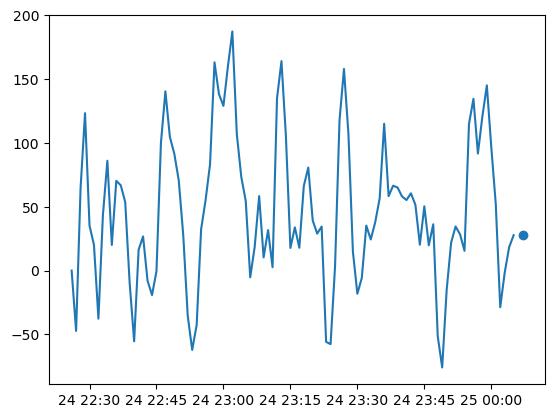

In [80]:
plt.scatter(ACE_test[ACE_test.columns[2]][101:102],(ACE_test[ACE_test.columns[1]][99:100]))
plt.plot(ACE_test[ACE_test.columns[2]][0:100],ACE_test[ACE_test.columns[1]][0:100])


or RMSE

In [32]:
np.sqrt(ACE_test_diff.pow(2).mean())

52.82853296087804

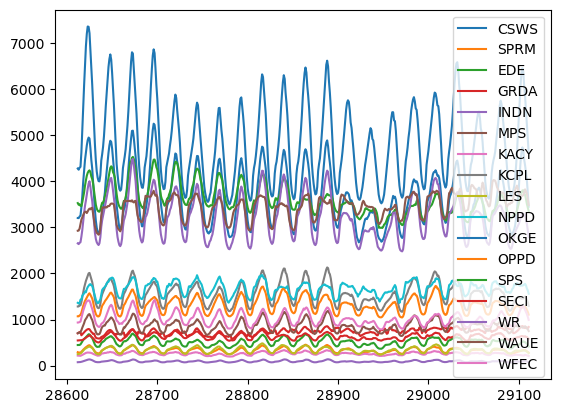

In [102]:
plt.plot(load_test[load_test.columns[7:]][-500:], label =load_test.columns[7:] )
plt.legend()
plt.show()

In [4]:
load_spp_eia_Jun19_Oct22 =pd.read_csv(r"..\importdata\load_spp_eia_Jun19_Oct22.csv")

In [7]:
load_spp_eia_Jun19_Oct22

,Unnamed: 0,UTC time,Local date,Hour,Local time,Time zone,D,CSWS,SPRM,EDE,...,KCPL,LES,NPPD,OKGE,OPPD,SPS,SECI,WR,WAUE,WFEC
0,34824,2019-06-21 06:00:00,2019-06-21,1,2019-06-21 01:00:00,Central,31379.0,6147.0,386.0,586.0,...,1938.0,372.0,1553.0,4518.0,1320.0,3893.0,687.0,3830.0,2814.0,1158.0
1,34825,2019-06-21 07:00:00,2019-06-21,2,2019-06-21 02:00:00,Central,29906.0,5860.0,360.0,552.0,...,1805.0,346.0,1484.0,4318.0,1247.0,3736.0,654.0,3648.0,2728.0,1108.0
2,34826,2019-06-21 08:00:00,2019-06-21,3,2019-06-21 03:00:00,Central,28954.0,5654.0,347.0,532.0,...,1716.0,330.0,1431.0,4185.0,1209.0,3614.0,633.0,3518.0,2696.0,1098.0
3,34827,2019-06-21 09:00:00,2019-06-21,4,2019-06-21 04:00:00,Central,28332.0,5536.0,338.0,524.0,...,1668.0,318.0,1395.0,4063.0,1190.0,3551.0,614.0,3437.0,2665.0,1080.0
4,34828,2019-06-21 10:00:00,2019-06-21,5,2019-06-21 05:00:00,Central,28189.0,5490.0,341.0,526.0,...,1663.0,305.0,1395.0,4050.0,1187.0,3510.0,607.0,3424.0,2663.0,1072.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29107,63931,2022-10-16 01:00:00,2022-10-15,20,2022-10-15 20:00:00,Central,30570.0,5853.0,341.0,509.0,...,1504.0,325.0,1773.0,4349.0,1282.0,3703.0,638.0,3263.0,3825.0,1206.0
29108,63932,2022-10-16 02:00:00,2022-10-15,21,2022-10-15 21:00:00,Central,29685.0,5535.0,327.0,491.0,...,1470.0,316.0,1740.0,4195.0,1251.0,3617.0,624.0,3177.0,3787.0,1166.0
29109,63933,2022-10-16 03:00:00,2022-10-15,22,2022-10-15 22:00:00,Central,28651.0,5233.0,312.0,473.0,...,1428.0,302.0,1673.0,4017.0,1209.0,3511.0,621.0,3072.0,3731.0,1120.0
29110,63934,2022-10-16 04:00:00,2022-10-15,23,2022-10-15 23:00:00,Central,27434.0,4925.0,297.0,448.0,...,1373.0,289.0,1634.0,3764.0,1168.0,3432.0,599.0,2943.0,3607.0,1061.0


In [89]:
load_train, load_test = train_test_split(load_spp_eia_Jun19_Oct22,train_size = .8,shuffle= False)

In [90]:
load_diff = load_test[load_test.columns[6:]].diff().iloc[1:]

In [91]:
load_diff.abs().mean()

D       961.155960
CSWS    225.269323
SPRM     16.951220
EDE      25.334421
GRDA     18.684473
INDN      6.093782
MPS      42.558399
KACY      8.549983
KCPL     72.327722
LES      16.850739
NPPD     50.157334
OKGE    145.435933
OPPD     52.104431
SPS      74.861903
SECI     17.988835
WR      133.241154
WAUE     66.116627
WFEC     37.206115
dtype: float64

In [92]:
np.sqrt(load_diff.pow(2).mean())

D       1189.353293
CSWS     277.892106
SPRM      21.666573
EDE       31.770500
GRDA      25.193334
INDN       7.922287
MPS       53.345846
KACY      10.833108
KCPL      91.520137
LES       21.156997
NPPD      63.382512
OKGE     181.306427
OPPD      66.352672
SPS       93.263723
SECI      22.573583
WR       168.481679
WAUE      84.671770
WFEC      46.104466
dtype: float64

Try seasonal Naive?

Try longer term Naive

Try RMSE with zero